**SCS3253-Term Project**

 **Instructor: Ghassem Tofighi**


**Kewei	Chen
David Wang	
Jianhong Zhang	
Stephen Ho**

April 16th, 2019



Data are from Breast Cancer file of UCI archive.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Creators: 

1. Dr. William H. Wolberg, General Surgery Dept. 
University of Wisconsin, Clinical Sciences Center 
Madison, WI 53792 
wolberg '@' eagle.surgery.wisc.edu 

2. W. Nick Street, Computer Sciences Dept. 
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 
street '@' cs.wisc.edu 608-262-6619 

3. Olvi L. Mangasarian, Computer Sciences Dept. 
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 
olvi '@' cs.wisc.edu 

In [0]:
# Suppress or disable the system warning msg
import warnings; warnings.simplefilter('ignore')

In [62]:
# load necessities 
import numpy as np
import pandas as pd
import random
import seaborn as sb
from scipy import interp
import itertools
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from IPython.display import display
from sklearn import decomposition, preprocessing, metrics,svm, datasets
import sklearn.datasets, sklearn.decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 


%matplotlib inline # show plot

UsageError: unrecognized arguments: # show plot


**Import Data & inspect Data**

In [63]:
# load data

BC_PY= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', delimiter=',', skiprows=[1], header=None)
BC_PY.head()
#BC_PY.describe().T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,84300903,M,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


# 1. Exploring Data

## Assign column names to the dataset
Check the header of the dataset

In [64]:
# rename columns 
# of all these features, 3 categories can be listed by orignal file:
# 1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

# Ten real-valued features are computed for each cell nucleus:

# a) radius (mean of distances from center to points on the perimeter) 
# b) texture (standard deviation of gray-scale values) 
# c) perimeter d) area e) smoothness (local variation in radius lengths) 
# f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) 
# h) concave points (number of concave portions of the contour) i) symmetry 
# j) fractal dimension ("coastline approximation" - 1)

# The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 

## for the learning purpose, all features were included in the ML

name_list=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

BC_PY.columns = name_list



display(BC_PY.head())
display("Data dimension is:", BC_PY.shape)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,84300903,M,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


'Data dimension is:'

(568, 32)

## Change diaganosis M/B to categrical codes 1/0

In [0]:
# recode Categorical as lable== 0/1

BC_PY.columns; # count how many columns
BC_PY.diagnosis = pd.Categorical(BC_PY.diagnosis) # covert 'M/B' to '1/0'
BC_PY['label'] = BC_PY.diagnosis.cat.codes #add a new colum 'label' to represent the categorical diaganosis result


In [66]:
BC_PY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 33 columns):
id                         568 non-null int64
diagnosis                  568 non-null category
radius_mean                568 non-null float64
texture_mean               568 non-null float64
perimeter_mean             568 non-null float64
area_mean                  568 non-null float64
smoothness_mean            568 non-null float64
compactness_mean           568 non-null float64
concavity_mean             568 non-null float64
concave_points_mean        568 non-null float64
symmetry_mean              568 non-null float64
fractal_dimension_mean     568 non-null float64
radius_se                  568 non-null float64
texture_se                 568 non-null float64
perimeter_se               568 non-null float64
area_se                    568 non-null float64
smoothness_se              568 non-null float64
compactness_se             568 non-null float64
concavity_se               568 n

In [67]:
BC_PY.drop(['id','diagnosis'],axis=1).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,label
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
2,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
3,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
4,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


In [68]:
BC_PY.drop(['id','diagnosis'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,568.0,14.115949,3.516744,6.981000,11.697500,13.355000,15.780000,28.11000
texture_mean,568.0,19.292324,4.304353,9.710000,16.170000,18.855000,21.802500,39.28000
perimeter_mean,568.0,91.896972,24.259470,43.790000,75.135000,86.210000,103.875000,188.50000
area_mean,568.0,653.707570,351.092917,143.500000,420.175000,548.750000,782.625000,2501.00000
smoothness_mean,568.0,0.096381,0.014068,0.052630,0.086400,0.095895,0.105325,0.16340
compactness_mean,568.0,0.104386,0.052848,0.019380,0.064815,0.093125,0.130425,0.34540
concavity_mean,568.0,0.088803,0.079790,0.000000,0.029540,0.061400,0.131000,0.42680
concave_points_mean,568.0,0.048882,0.038827,0.000000,0.020310,0.033455,0.074010,0.20120
symmetry_mean,568.0,0.181162,0.027438,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,568.0,0.062808,0.007062,0.049960,0.057775,0.061545,0.066127,0.09744


## Create seaborn graphs to check the relationships between data features

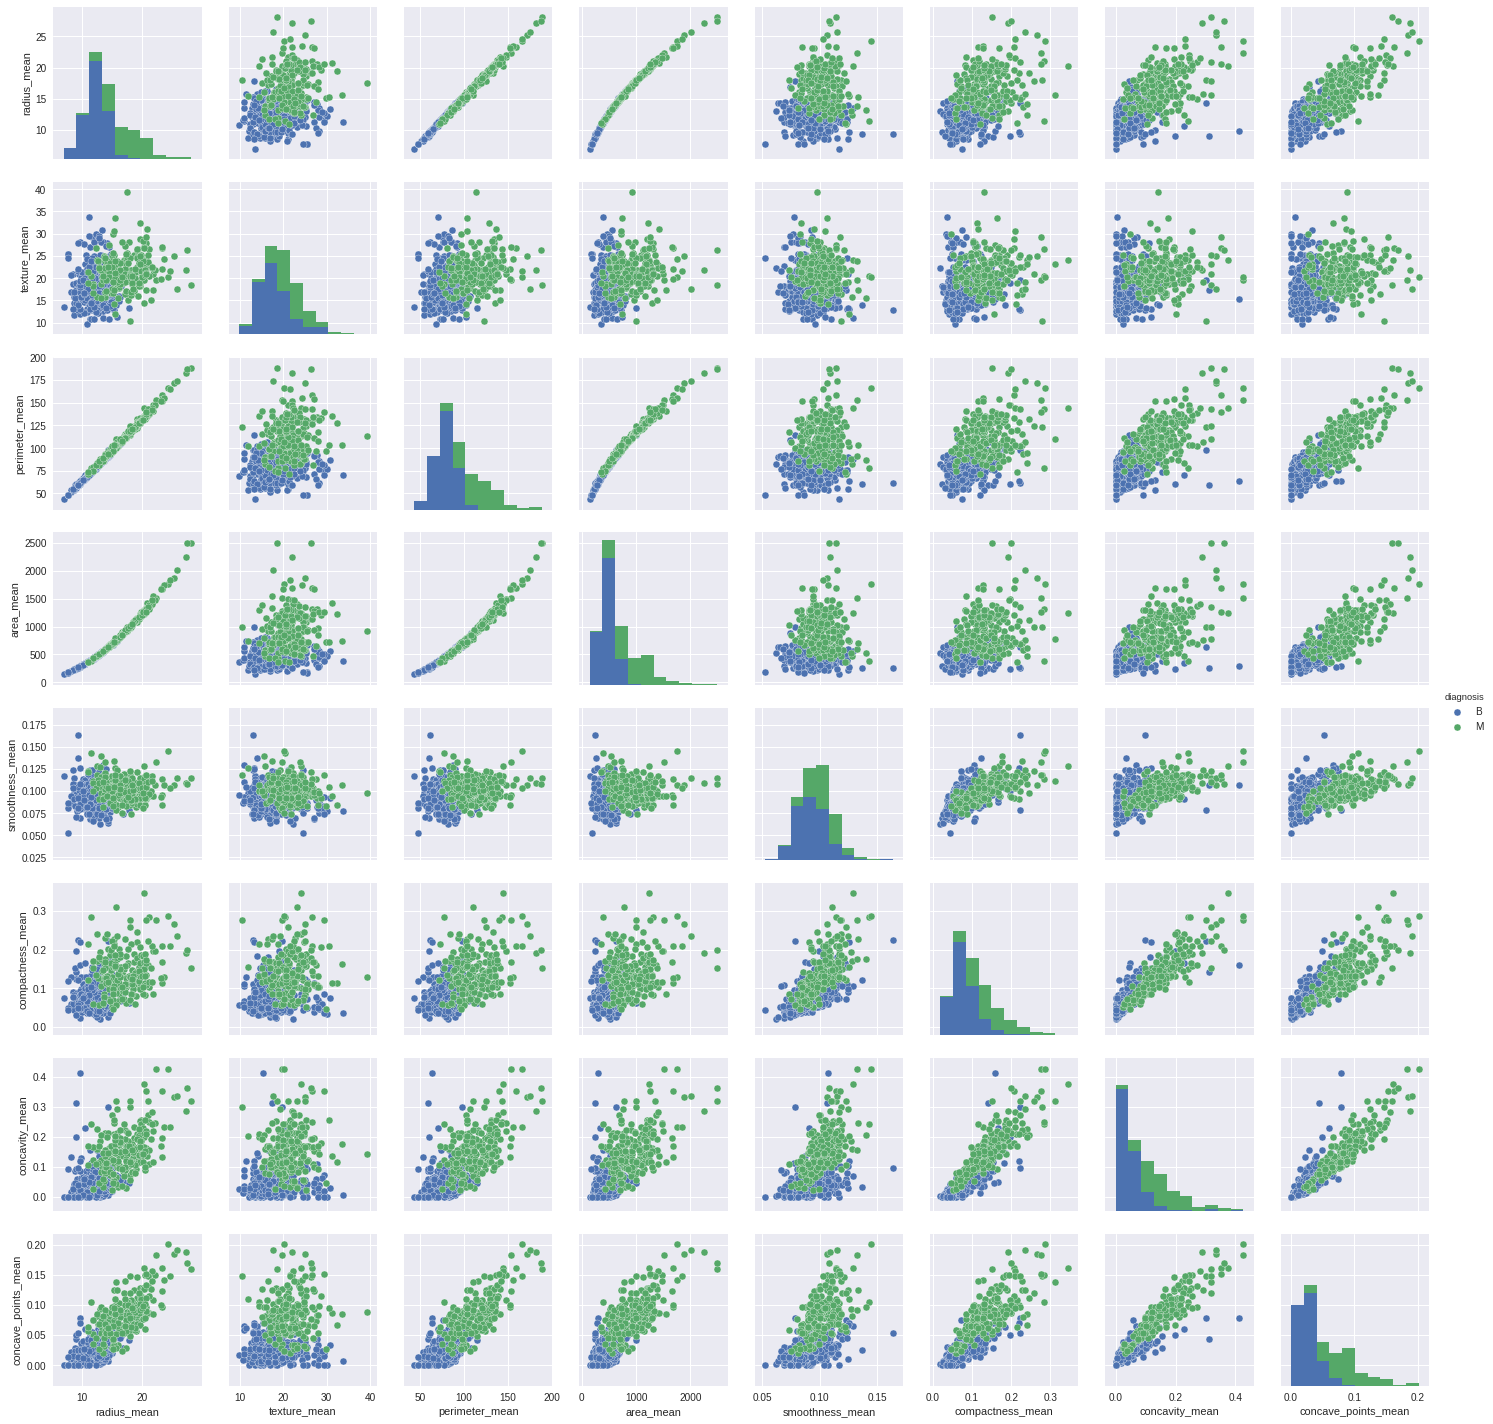

In [69]:
import seaborn as sns

# TO save time, parts of datavisualized
sns.pairplot(BC_PY[name_list[1:10]], hue='diagnosis')

In [70]:
len(name_list)
# name_list[1:32]

32

# 2. Plot ROC using SVM
This tells us how good is the SVM model can be used to predict whether the tumor is Maglinan or Benign.

We have tried other classifers as well and SVM produces better results.

In [0]:
# prepare ROC data
# full list

# features
X_BC_py =BC_PY[name_list[2:32]]  # exclude {'id' and 'diagnosis' }

# target
y_BC_py =BC_PY[['label']].as_matrix() # .as_matrix converts values to matrix

In [72]:
X_BC_py.shape, y_BC_py.shape


((568, 30), (568, 1))

In [0]:
# Run classifier of SVM with cross-validation and plot ROC curves

cv2 = StratifiedKFold(n_splits=5)  # 5-folds split

classifier2 = svm.SVC(kernel="rbf", probability=True, random_state=42)


# Intialize the variables used for plotting the graph
tprs_BC_py = []
aucs_BC_py = []
mean_fpr_BC_py = np.linspace(0, 1, 100)
random_state = np.random.RandomState(0) #random seeding

nt_samples_BC_py, nt_features_BC_py=X_BC_py.shape

# add noise
# adding noise expands the size of the training dataset. 
# Each time a training sample is exposed to the model, 
# random noise is added to the input variables making them different every time it is exposed to the model.

random.seed(2019)
X_BC_py0 = np.c_[X_BC_py, random_state.randn(nt_samples_BC_py, 20*nt_features_BC_py)] 
# concatenate original feature dataset with the random generated dataset (noise)

#print(X_BC_py0.shape)

In [74]:
X_BC_py0

array([[ 1.79900000e+01,  1.03800000e+01,  1.22800000e+02, ...,
        -2.16731471e-01, -9.30156503e-01, -1.78589092e-01],
       [ 1.96900000e+01,  2.12500000e+01,  1.30000000e+02, ...,
        -5.93777448e-01, -2.01188032e+00,  5.89703606e-01],
       [ 1.14200000e+01,  2.03800000e+01,  7.75800000e+01, ...,
         1.83450254e-01, -4.70742498e-01,  2.72796390e-01],
       ...,
       [ 1.66000000e+01,  2.80800000e+01,  1.08300000e+02, ...,
         4.64738202e-01, -7.06096303e-01, -5.45878528e-01],
       [ 2.06000000e+01,  2.93300000e+01,  1.40100000e+02, ...,
        -1.29086598e-01,  2.24347275e-01,  1.55909776e+00],
       [ 7.76000000e+00,  2.45400000e+01,  4.79200000e+01, ...,
        -1.28922166e+00, -1.28688575e-01,  6.19718561e-01]])

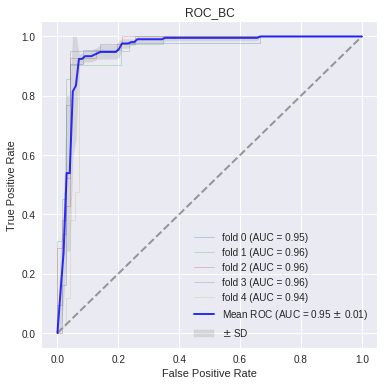

In [75]:
# random seeding
random.seed(9001)

plt.figure(figsize=(6,6))

i = 0

for train, test in cv2.split(X_BC_py0, y_BC_py):
    probas_ = classifier2.fit(X_BC_py0[train], y_BC_py[train]).predict_proba(X_BC_py0[test]) 
    # X_BC_py0 is the training dataset with noise added
    
    # Compute ROC curve and area the curve
    fpr_BC_py, tpr_BC_py, thresholds = roc_curve(y_BC_py[test], probas_[:, 1]) 
    # generate parameters for ROC plotting
    
    tprs_BC_py.append(interp(mean_fpr_BC_py, fpr_BC_py, tpr_BC_py)) 
    # 'mean_fpr_BC_py' acts as kind of scaler to interpolate fpr and tpr to the same number of slices
  
    tprs_BC_py[-1][0] = 0.0 # flip the scale for ROC plotting
    
    roc_auc_BC_py = auc(fpr_BC_py, tpr_BC_py) # calculate AUC
    aucs_BC_py.append(roc_auc_BC_py)
    plt.plot(fpr_BC_py, tpr_BC_py, lw=1, alpha=0.3,
             label='fold %d (AUC = %0.2f)' % (i, roc_auc_BC_py))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey',
         alpha=.8)  

mean_tpr_BC_py = np.mean(tprs_BC_py, axis=0)
mean_tpr_BC_py[-1] = 1.0
mean_auc_BC_py = auc(mean_fpr_BC_py, mean_tpr_BC_py) # average AUC of the 5 folded datasets

# add the grey area which represents the standard deviation of errors among AUCs of 5 folded datasets
std_auc_BC_py = np.std(aucs_BC_py) 
plt.plot(mean_fpr_BC_py, mean_tpr_BC_py, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_BC_py, std_auc_BC_py),
         lw=2, alpha=.8)

std_tpr_BC_py= np.std(tprs_BC_py, axis=0)
tprs_upper_BC_py = np.minimum(mean_tpr_BC_py + std_tpr_BC_py, 1)
tprs_lower_BC_py = np.maximum(mean_tpr_BC_py - std_tpr_BC_py, 0)
plt.fill_between(mean_fpr_BC_py, tprs_lower_BC_py, tprs_upper_BC_py, color='grey', alpha=.2,
                 label=r'$\pm$ SD')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
# plt.xlabel('1-Specificity')
# plt.ylabel('Sensitivity')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC_BC")
plt.legend(loc=0)
plt.show()



# 3. Feature Selection
This ranks importance of each feature using Decision Tree Regressor.


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



X_train,X_test, y_train, y_test = train_test_split(X_BC_py, y_BC_py, test_size=0.3, random_state=42)

In [0]:
# X_BC_py.shape

In [77]:
from sklearn.tree import DecisionTreeRegressor

# Create DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=5, min_samples_split=2, random_state=42)


# Train the classifier
dt.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(X_BC_py.columns, dt.feature_importances_):
    print(feature)

('radius_mean', 0.0)
('texture_mean', 0.018013669587164403)
('perimeter_mean', 0.0)
('area_mean', 0.01828748205323592)
('smoothness_mean', 0.0)
('compactness_mean', 0.0)
('concavity_mean', 0.0)
('concave_points_mean', 0.025808621293902496)
('symmetry_mean', 0.0)
('fractal_dimension_mean', 0.0)
('radius_se', 0.02389580701586082)
('texture_se', 0.0)
('perimeter_se', 0.0)
('area_se', 0.0)
('smoothness_se', 0.0)
('compactness_se', 0.0)
('concavity_se', 0.0)
('concave points_se', 0.020587050956759334)
('symmetry_se', 0.0)
('fractal_dimension_se', 0.0)
('radius_worst', 0.0)
('texture_worst', 0.0529656391509698)
('perimeter_worst', 0.7572810574146069)
('area_worst', 0.0)
('smoothness_worst', 0.0)
('compactness_worst', 0.0)
('concavity_worst', 0.0)
('concave_points_worst', 0.08316067252750003)
('symmetry_worst', 0.0)
('fractal_dimension_worst', 0.0)


In [78]:
## new 
featurelist=pd.DataFrame(list(zip(X_BC_py.columns, dt.feature_importances_)), columns = ['Name', 'Importance']).sort_values(by=['Importance'], ascending=True)

print(featurelist)

                       Name  Importance
0               radius_mean    0.000000
26          concavity_worst    0.000000
25        compactness_worst    0.000000
24         smoothness_worst    0.000000
23               area_worst    0.000000
20             radius_worst    0.000000
19     fractal_dimension_se    0.000000
18              symmetry_se    0.000000
16             concavity_se    0.000000
15           compactness_se    0.000000
28           symmetry_worst    0.000000
13                  area_se    0.000000
14            smoothness_se    0.000000
11               texture_se    0.000000
2            perimeter_mean    0.000000
4           smoothness_mean    0.000000
12             perimeter_se    0.000000
5          compactness_mean    0.000000
6            concavity_mean    0.000000
29  fractal_dimension_worst    0.000000
8             symmetry_mean    0.000000
9    fractal_dimension_mean    0.000000
1              texture_mean    0.018014
3                 area_mean    0.018287


In [0]:
# IMPORTANCE=dt.feature_importances_
# Indices=np.argsort(IMPORTANCE)[::-1]
# for f in range(X_BC_py.shape[1]):
#   print("%2d) % -*s %f" % (f +1, 33, X_BC_py.columns[f], IMPORTANCE[Indices[f]]))

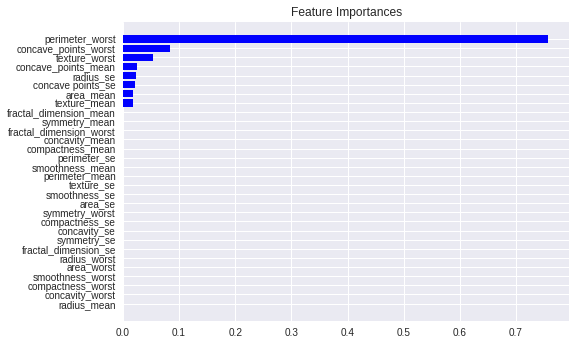

In [79]:
## new 
plt.title('Feature Importances')
plt.barh(range(X_BC_py.shape[1]), featurelist['Importance'], color='blue', align='center')
plt.yticks(range(X_BC_py.shape[1]),featurelist['Name'], rotation=0) 
plt.show()

In [80]:
# dt.feature_importances_
# indices
IMPORTANCE
# feature_importances_

array([0.        , 0.01801367, 0.        , 0.01828748, 0.        ,
       0.        , 0.        , 0.02580862, 0.        , 0.        ,
       0.02389581, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02058705, 0.        , 0.        ,
       0.        , 0.05296564, 0.75728106, 0.        , 0.        ,
       0.        , 0.        , 0.08316067, 0.        , 0.        ])

In [84]:
# Identify And Select Most Important Features
# features that have an importance of more than 0.02
dtm = SelectFromModel(dt, threshold=0.02)

# # Train the selector
dtm.fit(X_train, y_train)

print(dtm.get_support(indices=True))

# Print the names of the most important features
for feature_list_index in dtm.get_support(indices=True):
    print(X_BC_py.columns[feature_list_index])

[ 7 10 17 21 22 27]
concave_points_mean
radius_se
concave points_se
texture_worst
perimeter_worst
concave_points_worst


In [0]:
# short list using selected variables
X_BC_pyS =BC_PY[['concave_points_mean', 'radius_se', 'concave points_se', 'texture_worst',
                 'perimeter_worst', 'concave_points_worst']].as_matrix()

## Plot ROC using selected important features

In [0]:
nt_samples_BC_py, nt_features_BC_py=X_BC_pyS.shape

# add noise
random.seed(2019)
X_BC_py0S = np.c_[X_BC_pyS, random_state.randn(nt_samples_BC_py, 20*nt_features_BC_py)]


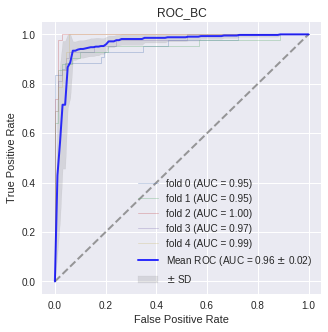

In [87]:
## TO plot shorted version of X_BC_py0S, replacement were usued 


plt.figure(figsize=(5,5))

# import random
random.seed(901)

i = 0

for train, test in cv2.split(X_BC_py0S, y_BC_py):
    probas_ = classifier2.fit(X_BC_py0S[train], y_BC_py[train]).predict_proba(X_BC_py0S[test])
    # Compute ROC curve and area the curve
    fpr_BC_py, tpr_BC_py, thresholds = roc_curve(y_BC_py[test], probas_[:, 1])
    tprs_BC_py.append(interp(mean_fpr_BC_py, fpr_BC_py, tpr_BC_py))
    tprs_BC_py[-1][0] = 0.0
    roc_auc_BC_py = auc(fpr_BC_py, tpr_BC_py)
    aucs_BC_py.append(roc_auc_BC_py)
    plt.plot(fpr_BC_py, tpr_BC_py, lw=1, alpha=0.3,
             label='fold %d (AUC = %0.2f)' % (i, roc_auc_BC_py))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='grey',
         alpha=.8)  

mean_tpr_BC_py = np.mean(tprs_BC_py, axis=0)
mean_tpr_BC_py[-1] = 1.0
mean_auc_BC_py = auc(mean_fpr_BC_py, mean_tpr_BC_py)
std_auc_BC_py = np.std(aucs_BC_py)
plt.plot(mean_fpr_BC_py, mean_tpr_BC_py, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_BC_py, std_auc_BC_py),
         lw=2, alpha=.8)

std_tpr_BC_py= np.std(tprs_BC_py, axis=0)
tprs_upper_BC_py = np.minimum(mean_tpr_BC_py + std_tpr_BC_py, 1)
tprs_lower_BC_py = np.maximum(mean_tpr_BC_py - std_tpr_BC_py, 0)
plt.fill_between(mean_fpr_BC_py, tprs_lower_BC_py, tprs_upper_BC_py, color='grey', alpha=.2,
                 label=r'$\pm$ SD')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
# plt.xlabel('1-Specificity')
# plt.ylabel('Sensitivity')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC_BC")
plt.legend(loc=0)
plt.show()


# 4. Create Confusion Matrix

Confusion Matrix 
 [[96  7]
 [ 6 62]]


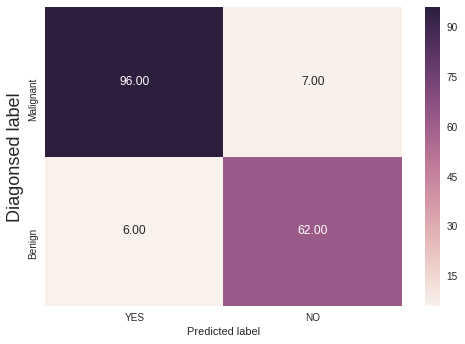

In [88]:
from sklearn.metrics import confusion_matrix

y_pred=dt.predict(X_test)
# print(y_pred)


cm = confusion_matrix(y_test, y_pred.round())
print ('Confusion Matrix \n', cm)

sb.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["YES", "NO"] , yticklabels = ["Malignant", "Benign"] )
plt.ylabel('Diagonsed label', fontsize=18)
plt.xlabel('Predicted label')
plt.show()

# 5. Apply PCA (principal component analysis)

## Scale the data and prepare for PCA

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Separating out the features
x = X_BC_py.values
# # Separating out the target
y = BC_PY.iloc[:,1].values
print(y)
# # Standardizing the features
x_sc = StandardScaler().fit_transform(x)
x_sc[:2]

[M, M, M, M, M, ..., M, M, M, M, B]
Length: 568
Categories (2, object): [B, M]


array([[ 1.10257274, -2.07236249,  1.27497707,  0.99004717,  1.56657617,
         3.28045645,  2.65050117,  2.53188281,  2.21556799,  2.25373332,
         2.48896952, -0.5666926 ,  2.8311763 ,  2.48790394, -0.21494768,
         1.31504096,  0.72273793,  0.660736  ,  1.14698518,  0.90611861,
         1.89365202, -1.35891099,  2.3090709 ,  2.00913443,  1.30603816,
         2.61403389,  2.10745364,  2.29836197,  2.747919  ,  1.93594111],
       [ 1.58640055,  0.45521398,  1.57202999,  1.56590058,  0.94049383,
         1.05136271,  1.36223853,  2.0369428 ,  0.93886117, -0.3994514 ,
         1.22874362, -0.78146727,  0.85069536,  1.18217712, -0.29790484,
         0.81338204,  0.21215006,  1.42411735,  0.23554491,  0.29312896,
         1.51808236, -0.02460569,  1.35179812,  1.46293949,  0.52634842,
         1.08139937,  0.85398037,  1.95723098,  1.15087329,  0.20172282]])

## Apply PCA and create a new dataframe 
The new dataframe contains the new dataset after the PCA process along with the target values.

In [0]:

pca = PCA(n_components=15, svd_solver="arpack", tol=0.0, iterated_power="auto", random_state=1239)
principalComponents = pca.fit_transform(x_sc)
principalDf = pd.DataFrame(data = principalComponents,
              columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6', 'PC7', 'PC8','PC9',
                         'PC10', 'PC11','PC12','PC13', 'PC14','PC15'])

In [91]:
finalDf = pd.concat([principalDf,  BC_PY[['diagnosis']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,diagnosis
0,9.195843,1.940118,-1.120328,3.638836,-1.178202,1.411426,2.159130,-0.395249,-0.175803,-0.869840,0.253994,-0.857596,0.118000,-0.698768,-0.600806,M
1,5.739294,-1.084812,-0.553853,0.918415,-0.170012,0.541467,-0.667637,0.097976,0.027173,0.469996,-0.598323,0.116309,-0.412084,0.005734,0.483886,M
2,7.122563,10.265222,-3.221338,0.150968,-2.964490,3.053531,1.427379,1.052628,-1.424439,-1.086837,-1.209447,0.984860,-0.893856,-0.484581,-0.167474,M
3,3.941532,-1.954340,1.387818,2.941444,0.559567,-1.225447,-0.936157,0.634708,-0.261905,0.378828,0.677523,-0.098460,0.362412,-0.547505,0.311377,M
4,2.382060,3.944936,-2.929900,0.942909,-1.053322,-0.450027,0.489986,-0.164974,-0.141335,-0.532026,0.094535,0.080101,-0.021287,0.005250,0.178419,M


## Apply SGD classifier on the dataset post PCA processing
Uses GridsearchCV to find the best parameters that explain the training dataset. (including the ideal number of PCA components)


Best parameter (CV score=0.937):
{'logistic__alpha': 0.01, 'pca__n_components': 4}


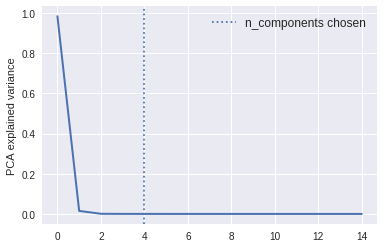

In [92]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
logistic = SGDClassifier(loss='log', penalty='l1', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)



pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5,6, 7, 8, 9, 10, 15, 20, 28],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5,
                      return_train_score=False)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0) = plt.subplots(nrows=1, sharex=True, figsize=(6, 4))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))


plt.show()

## Explore the top 3 principle components.
The graphs of these principle components with Malignant / Benign values show which principle component is more important to determine whether the tumore is Malignant or Benign

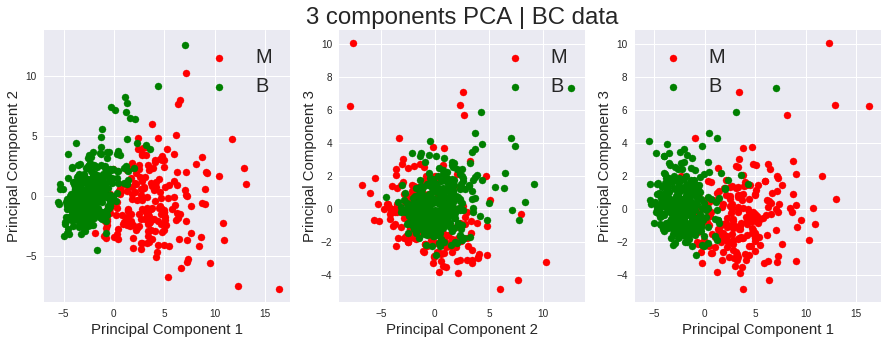

In [93]:
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1,3,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 components PCA | BC data', fontsize = 24)
diagnosis2 = ['M', 'B']
colors = ['r', 'g']
for diagnosis, color in zip(diagnosis2, colors):
    indicesToKeep = finalDf['diagnosis'] == diagnosis
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(diagnosis2,fontsize=20)
# ax.grid()

ax = fig.add_subplot(1,3,2) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 components PCA | BC data', fontsize = 24)
diagnosis2 = ['M', 'B']
colors = ['r', 'g']
for diagnosis, color in zip(diagnosis2, colors):
    indicesToKeep = finalDf['diagnosis'] == diagnosis
    ax.scatter(finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
    
ax.legend(diagnosis2,fontsize=20)
ax = fig.add_subplot(1,3,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
# ax.set_title('2 components PCA | BC data', fontsize = 24)
diagnosis2 = ['M', 'B']
colors = ['r', 'g']
for diagnosis, color in zip(diagnosis2, colors):
    indicesToKeep = finalDf['diagnosis'] == diagnosis
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(diagnosis2,fontsize=20)

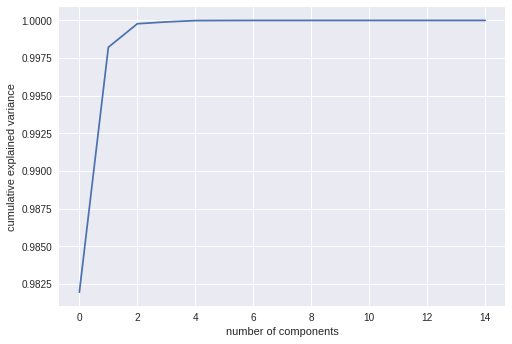

In [94]:
plt.plot(np.cumsum(pca.fit(x).explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [95]:
pca.explained_variance_

array([4.41719619e+05, 7.32255838e+03, 7.02849340e+02, 5.41772066e+01,
       3.99255040e+01, 3.00979468e+00, 1.81852811e+00, 3.72049279e-01,
       1.55361961e-01, 8.41966594e-02, 3.16529264e-02, 7.50861396e-03,
       3.16349223e-03, 2.16526064e-03, 1.32805335e-03])

In [96]:
# Explained Variance
val=pca.explained_variance_ratio_
print("The explained variance for PC1 is ", val[0], " for PC2 is ", val[1], " and PC3 is ", val[2])

The explained variance for PC1 is  0.9819382122111914  for PC2 is  0.016277972659436403  and PC3 is  0.0015624269191495145


# 6. Visualising high-dimensional datasets t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE takes the high dimentional dataset and reduces it to low dimentional graph but retains a lot of the original information.

In [97]:
from sklearn.manifold import TSNE

tsne_BC=X_BC_py.as_matrix()
tsne_BC

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       [1.142e+01, 2.038e+01, 7.758e+01, ..., 2.575e-01, 6.638e-01,
        1.730e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [98]:
# import numpy as np
# from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, perplexity=15, random_state=236).fit_transform(tsne_BC)
X_embedded.shape

(568, 2)

In [0]:
BC_PY.label;
yy=BC_PY.label

Text(0, 0.5, 'tSNE 2')

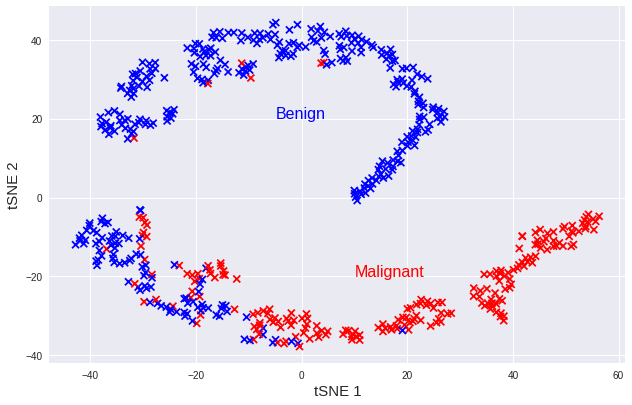

In [100]:
col = np.where(yy==1,'r','b')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=col, marker="x")
plt.text(-5,20, "Benign", size=16, color='b')
plt.text(10,-20, "Malignant", size=16, color='r')
plt.xlabel('tSNE 1', fontsize = 15)
plt.ylabel('tSNE 2', fontsize = 15)

# 7. Create Neural Network (Keras)

In [101]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras import backend as K

Using TensorFlow backend.


## Create plot function that can plot loss/accuracy against the number of epochs

In [0]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [103]:
BC_PY.iloc[:, 2:32].columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [104]:
X_BC_py.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [105]:
# Transform name species into numerical values. One hot encoder.
# This is different with the preivous categorical coding largely because the Categorical Classifier in
# loss function in Keras requires designated inputs.
le = LabelEncoder()
le.fit(y_BC_py)

y_BC_py_le = le.transform(y_BC_py)
y_BC_py_le = np_utils.to_categorical(y_BC_py_le)
print(y_BC_py_le[0:2])

[[0. 1.]
 [0. 1.]]


In [106]:
seed=36
print("seed=", seed)


X_tr, X_te, y_tr, y_te = train_test_split(x_sc, y_BC_py_le, 
                                                    test_size=0.15, random_state=seed)

print(X_BC_py.shape, X_tr.shape,  X_te.shape)

X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, 
                                                  test_size=0.2, random_state=seed)
print(X_BC_py.shape,  X_tr.shape, X_val.shape)

print("*"*60, "\n", 
      X_tr.shape[0]/X_BC_py.shape[0], 
      X_te.shape[0]/X_BC_py.shape[0],  
      X_val.shape[0]/X_BC_py.shape[0])

seed= 36
(568, 30) (482, 30) (86, 30)
(568, 30) (385, 30) (97, 30)
************************************************************ 
 0.6778169014084507 0.15140845070422534 0.17077464788732394


## Create a Sequential Neural Network

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Best: 0.976623 using {'batch_size': 10, 'epochs': 100}
0.974026 (0.013233) with: {'batch_size': 5, 'epochs': 50}
0.974026 (0.007304) with: {'batch_size': 5, 'epochs': 100}
0.963636 (0.015899) with: {'batch_size': 10, 'epochs': 50}
0.976623 (0.006284) with: {'batch_size': 10, 'epochs': 100}

....................................................................................................

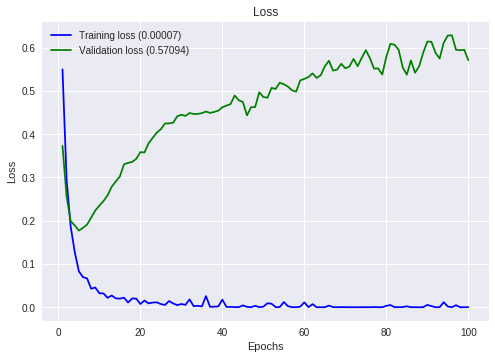

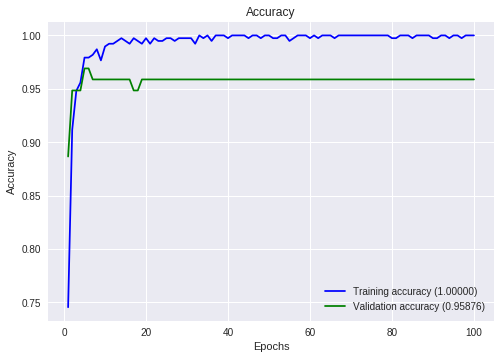

In [107]:
try:
    model
    del model
except NameError:
    model = None


np.random.seed(seed)
random.seed(seed*5)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K
tf.set_random_seed(seed*5)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# X = X_BC_py.values 
# Y = y_BC_py_le

# create model ++++++++++++++++++++++++++++++++++++++++++++++
def create_BC_model():
    model = Sequential()
    model.add(Dense(30, activation='relu')) # there are 30 features/inputs
    model.add(Dropout(0.05, name='dropout_1')) # adjust weights to avoid over fitting & reduce running time
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(12, activation = 'relu'))
    model.add(Dropout(0.05, name='dropout_2'))
    model.add(Dense(5, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))



    # https://keras.io/getting-started/sequential-model-guide/
    model.compile(optimizer = 'rmsprop',
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_BC_model, verbose=0)
# define the grid search parameters
batch_size = [5, 10] # first try batch 5 for grid search and then try batch size 10
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs =epochs )
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_tr, 
                       y_tr,
                       validation_data=(X_val, y_val))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
## plotting    
class PrintDot(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            if epoch % 100 == 0: print('')
            print('.', end='')


HISTORY=grid_result.best_estimator_.fit(X_tr, y_tr, 
                                        validation_data=(X_val, y_val),
                                        shuffle=True,
                                        callbacks=[PrintDot()])


plot_history(HISTORY)

As seen above graphs, potentail overfitting is observed when epochs >10. Need attentions. 


....................................................................................................

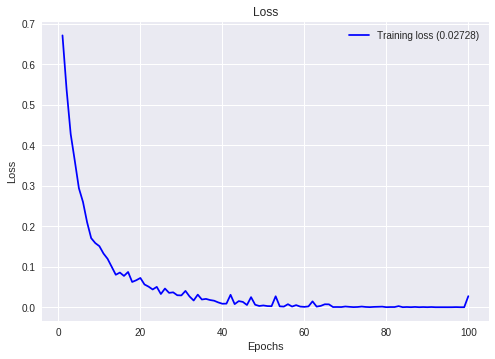

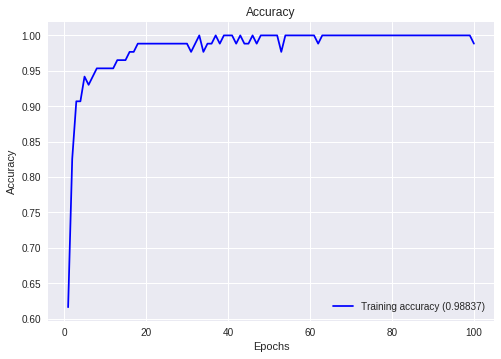

In [108]:
HISTORY_test=grid_result.best_estimator_.fit(X_te, y_te, 
#                                         validation_data=(X_val.values,y_val),
                                        shuffle=True,
                                        callbacks=[PrintDot()])


plot_history(HISTORY_test)


The graph above shows the loss/accuracy is minimized/maximized when epoch approaches 50. More interations after that doesn't create meaningful improvement.

## Plot Keras ROC vs SVM ROC

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# 
y_pred0 = grid_result.best_estimator_.predict_proba(X_te)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_te[:, 1], y_pred0[:,1])

auc_keras = auc(fpr_keras, tpr_keras)
print("Using scaled data::", auc_keras)



Using scaled data:: 1.0


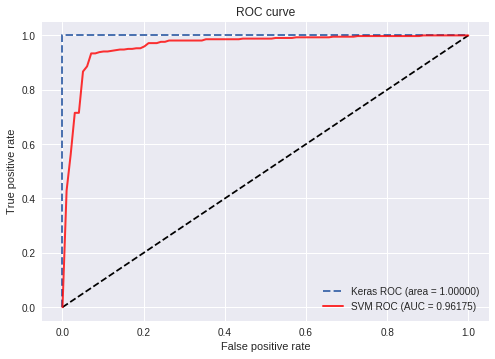

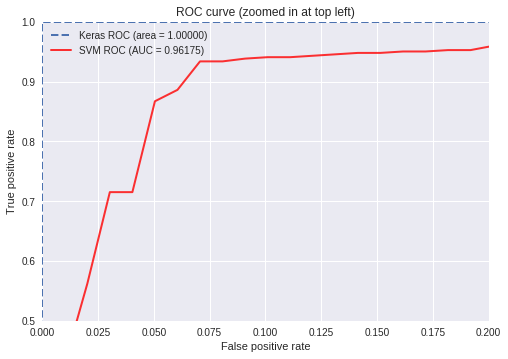

In [110]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, '--', linewidth=2,
         label='Keras ROC (area = {:.5f})'.format(auc_keras))
plt.plot(mean_fpr_BC_py, mean_tpr_BC_py, color='r',
         label=r'SVM ROC (AUC = %0.5f)' % (mean_auc_BC_py),
         lw=2, alpha=.8)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.5, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, '--', linewidth=2,
         label='Keras ROC (area = {:.5f})'.format(auc_keras))
plt.plot(mean_fpr_BC_py, mean_tpr_BC_py, color='r',
         label=r'SVM ROC (AUC = %0.5f)' % (mean_auc_BC_py),
         lw=2, alpha=.8)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()